In [1]:
from Reality import Reality
from Individual import Individual
from Organization import Organization
import matplotlib.pyplot as plt
import numpy as np

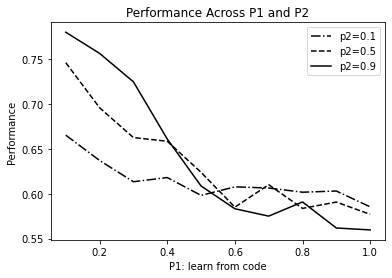

In [3]:
# Figure 1: varying p1 and p2
m = 30
n = 50
p1_list = np.arange(0.1, 1.1, 0.1)
p2_list = [0.1, 0.5, 0.9]
loop = 100
results = []
for p2 in p2_list:
    temp = []
    for p1 in p1_list:
        temp_2 = []
        for _ in range(100):
            reality = Reality(m=m)
            # individual = Individual(m=m, p1=p1, reality=reality)
            organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
            organization.process(loop=loop)
            temp_2.append(organization.performance_average)
        temp.append(sum(temp_2)/len(temp_2))
    results.append(temp)
x = p1_list
plt.plot(x, results[0], "k-.", label='p2=0.1')
plt.plot(x, results[1], "k--", label='p2=0.5')
plt.plot(x, results[2], "k-", label='p2=0.9')
# plt.savefig("search.jpg")
plt.title('Performance Across P1 and P2')
plt.xlabel('P1: learn from code')
plt.ylabel('Performance')
plt.legend()
plt.show()

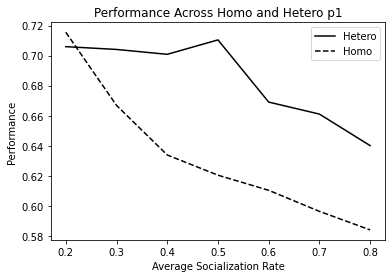

In [9]:
# Heterogeneous vs. Homogeneous Learners
# Figure 1: varying p1 and p2
m = 30
n = 50
p1_list = np.arange(0.2, 0.9, 0.1).tolist()
p2 = 0.5
loop = 100


class Organization(Organization):
    def __init__(self, m=None, n=None, p1=None, p2=None, reality=None, hetero_flag=False):
        self.m = m
        self.n = n
        self.code =[0] * self.m
        self.p1 = p1  # learning from code
        self.p2 = p2  # learning from beliefs
        self.reality = reality
        self.payoff = 0
        self.individuals = []
        if hetero_flag:
            low_learner_num = round((45-50*self.p1)/0.8)
            rapid_learner_num = self.n - low_learner_num
            for i in range(low_learner_num):
                individual = Individual(index=i, m=self.m, p1=0.1, reality=self.reality)
                self.individuals.append(individual)
            for i in range(rapid_learner_num):
                individual = Individual(index=low_learner_num + i, m=self.m, p1=0.9, reality=self.reality)
                self.individuals.append(individual)
        else:
            for i in range(self.n):
                individual = Individual(index=i, m=self.m, p1=self.p1, reality=self.reality)
                self.individuals.append(individual)
        self.superior_group = []

        # DV
        self.performance_curve = []  # the evolution of performance
        self.performance_average = 0  # performance iteration
hetero, homo = [], []
for p1 in p1_list:
    temp = []
    for _ in range(100):
        reality = Reality(m=m)
        # individual = Individual(m=m, p1=p1, reality=reality)
        organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality, hetero_flag=True)
        organization.process(loop=loop)
        temp.append(organization.performance_average)
    hetero.append(sum(temp)/len(temp))

for p1 in p1_list:
    temp = []
    for _ in range(100):
        reality = Reality(m=m)
        # individual = Individual(m=m, p1=p1, reality=reality)
        organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality, hetero_flag=False)
        organization.process(loop=loop)
        temp.append(organization.performance_average)
    homo.append(sum(temp)/len(temp))
x = p1_list
plt.plot(x, hetero, "k-", label='Hetero')
plt.plot(x, homo, "k--", label='Homo')
# plt.savefig("search.jpg")
plt.title('Performance Across Homo and Hetero p1')
plt.xlabel('Average Socialization Rate')
plt.ylabel('Performance')
plt.legend()
plt.show()

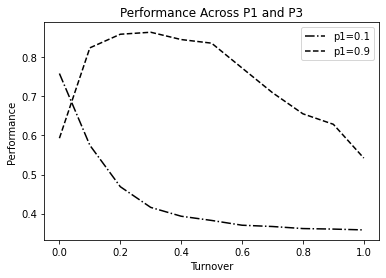

In [2]:
# Figure 4: Personnel Turnover
m = 30
n = 50
p1_list = [0.1, 0.9]
p2 = 0.5
p3_list = np.arange(0, 1.1, 0.1).tolist()
loop = 100
results = []
for p1 in p1_list:
    temp = []
    for p3 in p3_list:
        temp_2 = []
        for _ in range(100):
            reality = Reality(m=m)
            # individual = Individual(m=m, p1=p1, reality=reality)
            organization = Organization(m=m, n=n, p1=p1, p2=p2, reality=reality)
            organization.process(loop=loop, p3=p3)
            temp_2.append(organization.performance_average)
        temp.append(sum(temp_2)/len(temp_2))
    results.append(temp)
x = p3_list
plt.plot(x, results[0], "k-.", label='p1=0.1')
plt.plot(x, results[1], "k--", label='p1=0.9')
# plt.savefig("search.jpg")
plt.title('Performance Across P1 and P3')
plt.xlabel('Turnover')
plt.ylabel('Performance')
plt.legend()
plt.show()